<a href="https://colab.research.google.com/github/Shreyabansal3112/ANN/blob/main/perceptron_breast%20cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Perceptron

->breast cancer (imbalanced) data set from sklearn

->569 observations and 30 variables excluding the class variable (0 & 1)

In [ ]:
import sklearn.datasets 
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use("seaborn")

In [ ]:
#dataset loading
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names) 
data["class"] = breast_cancer.target 
data.head() 
data.describe() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
data.info

<bound method DataFrame.info of      mean radius  mean texture  ...  worst fractal dimension  class
0          17.99         10.38  ...                  0.11890      0
1          20.57         17.77  ...                  0.08902      0
2          19.69         21.25  ...                  0.08758      0
3          11.42         20.38  ...                  0.17300      0
4          20.29         14.34  ...                  0.07678      0
..           ...           ...  ...                      ...    ...
564        21.56         22.39  ...                  0.07115      0
565        20.13         28.25  ...                  0.06637      0
566        16.60         28.08  ...                  0.07820      0
567        20.60         29.33  ...                  0.12400      0
568         7.76         24.54  ...                  0.07039      1

[569 rows x 31 columns]>

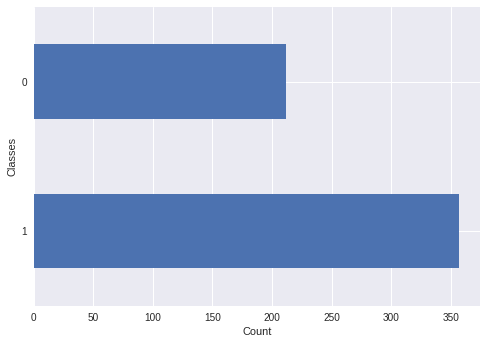

In [ ]:
#plotting a graph to see class imbalance 
data['class'].value_counts().plot(kind = "barh") 
plt.xlabel("Count") 
plt.ylabel("Classes") 
plt.show() 

In [ ]:
#scaling the dataset
X = data.drop("class", axis = 1) 
Y = data["class"]
mnscaler = MinMaxScaler() 
X = mnscaler.fit_transform(X) 
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns) 

In [ ]:
#train-test spliting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)
X_train = X_train.values
X_test = X_test.values

In [ ]:
#model fitting
p = Perceptron(random_state=42, max_iter=10000, tol=0.001)
p.fit(X_train, Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=10000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#model prediction
pred = p.predict(X_test)

In [ ]:
#performance evaluation
print(accuracy_score(Y_test, pred))

0.9649122807017544


In [ ]:
print(confusion_matrix(pred, Y_test))

[[19  0]
 [ 2 36]]


In [ ]:
print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.95      0.97        38

    accuracy                           0.96        57
   macro avg       0.95      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57

